In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp
from scipy.optimize import newton, bisect, fixed_point

# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: David Alejandro Perez
*Métodos computacionales 2024-II*

---

#1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}

- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?(Para este punto se recomienda emplear `dataframe`).

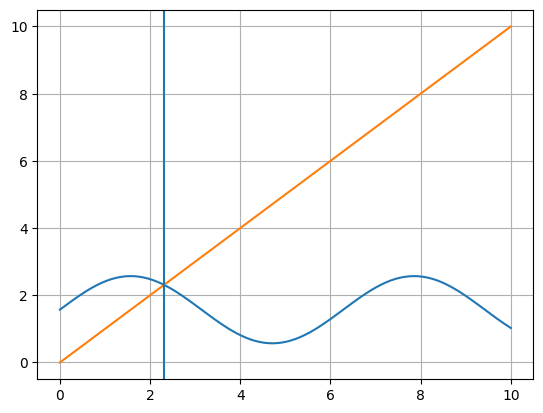

In [ ]:
func = lambda theta : np.sin(theta)+(np.pi/2)
theta = np.linspace(0,10,200)
plt.plot(theta,func(theta))
plt.plot(theta,theta)
plt.axvline(erre_1)
plt.grid()

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

In [ ]:


x = sp.symbols('x')
f = sp.sin(x) + sp.pi/2 - x
f_prime = sp.diff(f, x)
f_prima = sp.lambdify(x, f_prime)
f = sp.lambdify(x, f)
# Metodo Biseccion
f_1 = lambda theta : np.sin(theta)+(np.pi/2)
erre = bisect(f,2,4)

#metodo de punto fijo
erre_1 = fixed_point(f_1,2)
erre_1

#metodo de newton
erre_2 = newton(f,2,f_prima)

#metodo de la secante
erre_3 = newton(f,2) # ya que esta funcion utiliza el metodo de la secante cuando no se proporcion ¿su respectiva derivada :
print(f"""mediante el metodo de biseccion el angulo dio {erre};
luego, el metodo de punto fijo nos da el angulo igual a {erre_1};
luego, por medio del metodo de newton-rhapson nos da un resultado de {erre_2},
y por ultimo el metodo de lasecante nos da el sguiente resultado {erre_3} """)

mediante el metodo de biseccion el angulo dio 2.309881460010729;
luego, el metodo de punto fijo nos da el angulo igual a 2.3098814600100575;
luego, por medio del metodo de newton-rhapson nos da un resultado de 2.3098814600100575,
y por ultimo el metodo de lasecante nos da el sguiente resultado 2.309881460010033 


# 2

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.



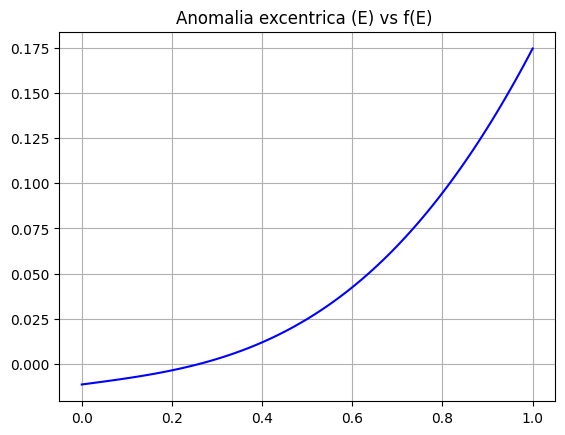

In [ ]:
#notemos que t = 1986.249315 años el 1 de abril
per = 75.960000
M = (2*np.pi/75.96000)*(1986.249315-1986.1113)
e = 0.9672671
Kepler = lambda E : E-e*np.sin(E)-M
E_x = np.linspace(0,1,100)

plt.plot(E_x,Kepler(E_x),color = 'b')
plt.title("Anomalia excentrica (E) vs f(E) ")
plt.grid()
plt.show()


* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$


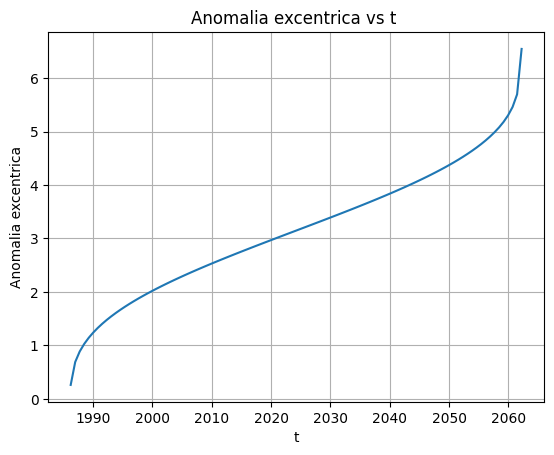

In [ ]:
t_0 = 1986.249315
T_m = []
d_t = per/100
t = 0
i = 0
while t < t_0 + per:
  t = t_0 + i*d_t
  i += 1
  T_m.append(t)

E_rai = []
for i in T_m:
  M = (2*np.pi/75.96000)*(i-1986.1113)
  F_e = lambda E: E-e*np.sin(E) - M
  E_rai.append(newton(F_e,2))

plt.plot(T_m,E_rai)
plt.xlabel("t")
plt.ylabel("Anomalia excentrica")
plt.title("Anomalia excentrica vs t ")
plt.grid()
plt.show()


In [ ]:
per/100

0.7595999999999999

#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson(Muestre su resultado con 4 cifras)


In [ ]:
T = 0.5
m = sp.symbols('m')
Mag_temp = sp.tanh(m/T) - m
mag_temp = sp.lambdify(m, Mag_temp)
Mag_prime = sp.diff(Mag_temp, m)
mag_prima = sp.lambdify(m, Mag_prime)

raiz_newton = newton(mag_temp,2,mag_prima)
raiz_secante = newton(mag_temp,2)

print(f"""mediante el metodo de newton la solucion dio {raiz_newton};
luego, el metodo de la secante nos da el que l solucion es igual a {raiz_secante}""")



mediante el metodo de newton la solucion dio 0.9575040240772688;
luego, el metodo de la secante nos da el que l solucion es igual a 0.9575040240772688


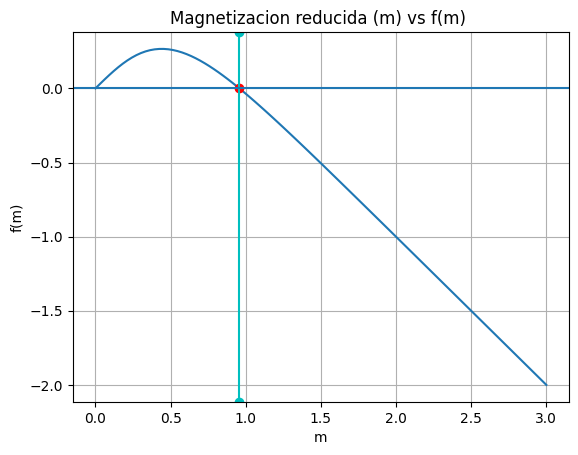

In [ ]:
m_x = np.linspace(0,3,100)


plt.plot(m_x,mag_temp(m_x))
plt.xlabel("m")
plt.ylabel("f(m)")
plt.plot(raiz_newton,0, marker ='o',color = 'r')
plt.title("Magnetizacion reducida (m) vs f(m) ")
plt.axvline(raiz_newton, marker='o', color='c')
#plt.axvline(raiz_secante,color='g')
plt.axhline(0)
plt.grid()
plt.show()

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

la raiz por medio de el metodo de punto fijo para un periodo T = 0.5 es de: 0.9575


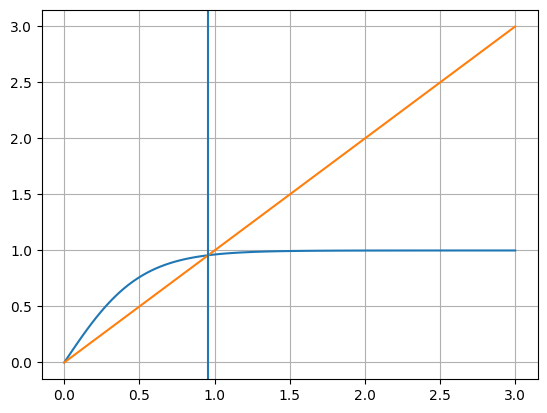

In [ ]:
#metodo de punto fijo
f_mag = lambda m: np.tanh(m/T)
raiz_pf = fixed_point(f_mag,0.5)
print(f"la raiz por medio de el metodo de punto fijo para un periodo T = 0.5 es de:", "%.4f" % raiz_pf)


plt.plot(m_x,f_mag(m_x))
plt.plot(m_x,m_x)
plt.axvline(raiz_pf)
plt.grid()


Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

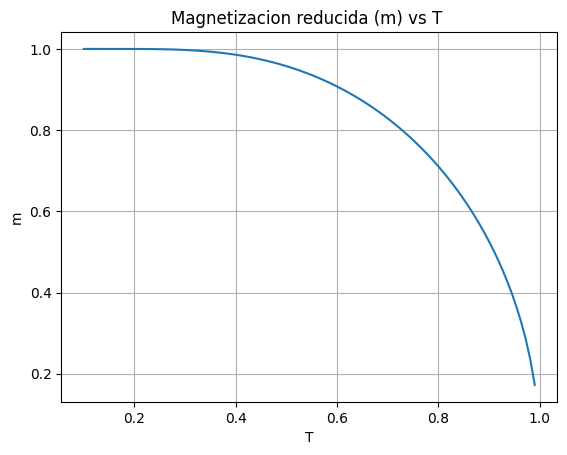

In [ ]:
T = np.linspace(0.1,0.99,100)
mag_red = []
for i in T:
  f_mag = lambda m: np.tanh(m/i) - m
  mag_red.append(newton(f_mag,2))


plt.plot(T,mag_red)
plt.xlabel("T")
plt.ylabel("m(T)")
plt.title("Magnetizacion reducida (m) vs T ")
plt.grid()
plt.show()


